In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyvttbl import DataFrame
from pyvttbl.stats import Anova
import os

In [9]:
##### SET STUDY VARIABLES
## Between-factors >> group on....
# Dep: Exptertise, FATR: Study
human = False
human = True

FATR = True
FATR = False



if FATR:
    print("** FATR Study **")
    source = os.path.join("data","fatr_students.csv")
    bfactor = "Study"
else:
    print("** Depend Study **")
    source = os.path.join("data","depend_only.csv")
    bfactor = "Expertise"


temp_csv_path = 'temp_cleaned_data.csv'

## Set DVs >> process multiple in one script, or just one at a time; 
dv_cols = ['NasaTLX','Decision','Diagnosis Time','Cooper Harper']
dv_cols = ['Cooper Harper']  
dv_cols = ['NasaTLX']
dv_cols = ['Diagnosis Time']  
dv_cols = ['Decision']

# Create a pyvttbl.DataFrame from the cleaned pandas DataFrame
df = DataFrame()
df_pandas = pd.read_csv(source)

# Calculate NasaTLX if this is the DV for analysis
if dv_cols[0] != "NasaTLX":
    ## Drop rows with missing values in relevant columns
    # CAUTION! If dv_cols list contains multiple columns, then columns missing row values will obliterate other columns' row values
    df_pandas = df_pandas.dropna(subset=dv_cols)
    temp_csv_path = 'temp_cleaned_data.csv'
    df_pandas.to_csv(temp_csv_path, index=False)
else:
    print("create NasaTLX composit measure...")
    # Invert 'Performance' scores
    df_pandas['Performance'] = 11 - df_pandas['Performance']
    columns = ['Performance', 'Temporal Demand', 'Frustration Level', 'Mental Demand', 'Effort']
    for column in columns:
        median = df_pandas[column].median()
        df_pandas[column].fillna(median)
    # Calculate the NasaTLX composite score
    df_pandas['NasaTLX'] = df_pandas[columns].mean(axis=1)
    df_pandas.to_csv(temp_csv_path, index=False)

df.read_tbl(temp_csv_path)


    
for dv in dv_cols:
    print(f"Running ANOVA for: {dv}")
    
    aov = Anova()
    aov.run(df, dv, wfactors=['Scenario', 'Fault'], bfactors=[bfactor])   
    aov.truncate(test='gg')

    if human:
        ### HUMAN READABLE
        print(aov)
        print("\n\n") # this puts spaces between reports when running multiples
    else:
        ### For the Robots
        print(dict(aov))
        print("\n\n") 
    
        marginal_means = aov.get_marginal_means(['Scenario', 'Fault', bfactor])
        print(f"Marginal Means for: {dv}")
        print(marginal_means)
        print("\n\n") 



** Depend Study **
Running ANOVA for: Decision
Decision ~ Scenario * Fault * Expertise

TESTS OF BETWEEN-SUBJECTS EFFECTS

Measure: Decision
     Source        Type III   df    MS       F      Sig.    et2_G   Obs.    SE     95% CI   lambda   Obs.  
                      SS                                                                             Power 
Between Subjects      1.958   23                                                                           
Expertise             0.667    1   0.667   11.355   0.003   0.129     12   0.074    0.145    6.194   0.662 
Error                 1.292   22   0.059                                                                   

TESTS OF WITHIN SUBJECTS EFFECTS

Measure: Decision
           Source                                   Type III   eps   df    MS       F        Sig.      et2_G   Obs.    SE     95% CI   lambda   Obs.  
                                                       SS                                                          

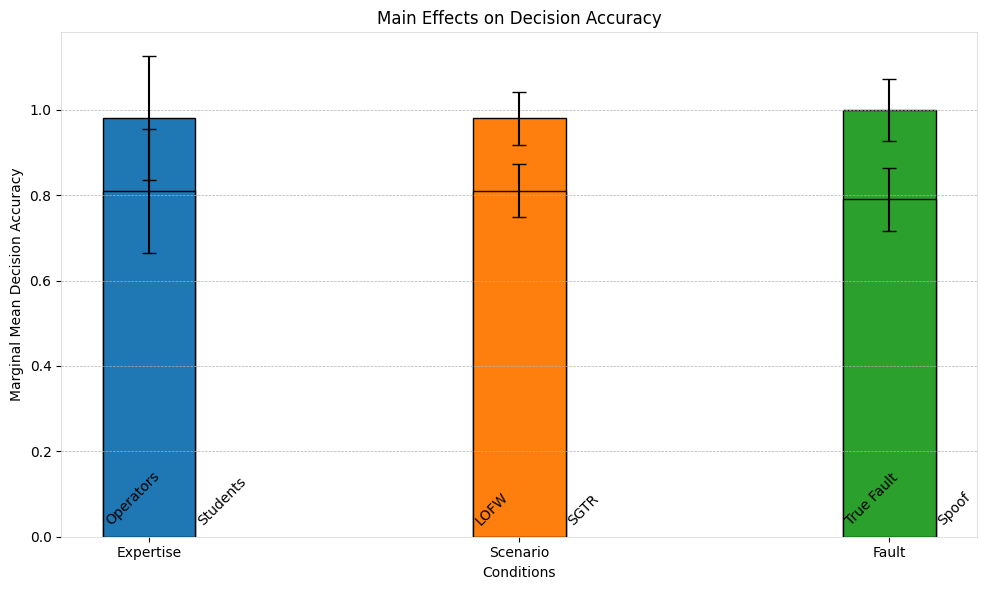

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Title and filename setup
title = 'Main Effects on Decision Accuracy'
filename = title.replace(' ', '_') + '.png'

# Data for mixed conditions
conditions = ['Expertise', 'Scenario', 'Fault']
levels = [['Operators', 'Students'], ['LOFW', 'SGTR'], ['True Fault', 'Spoof']]
means = [[0.98, 0.81], [0.98, 0.81], [1.00, 0.79]]
errors = [[0.145, 0.145], [0.062, 0.062], [0.073, 0.073]]

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r = np.arange(len(conditions))

# Creating a figure with a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the main effects as vertical bars
for i in range(len(conditions)):
    ax.bar(r[i], means[i], width=bar_width, yerr=errors[i], capsize=5, edgecolor='black', linewidth=1)
    for j in range(len(levels[i])):
        ax.text(r[i] + bar_width*(j-0.5), 0.02, levels[i][j], rotation=45, ha='left', va='bottom', fontsize=10)

ax.set_title('Main Effects on Decision Accuracy')
ax.set_ylabel('Marginal Mean Decision Accuracy')
ax.set_xlabel('Conditions')
ax.set_xticks(r)
ax.set_xticklabels(conditions)
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Adjusting axes
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_color('lightgray')
    ax.spines[spine].set_linewidth(0.5)

# Save the figure as a PNG file
plt.tight_layout()
plt.savefig(filename, format='png', dpi=300)
plt.show()

Main_Effects_on_Decision_Accuracy.png


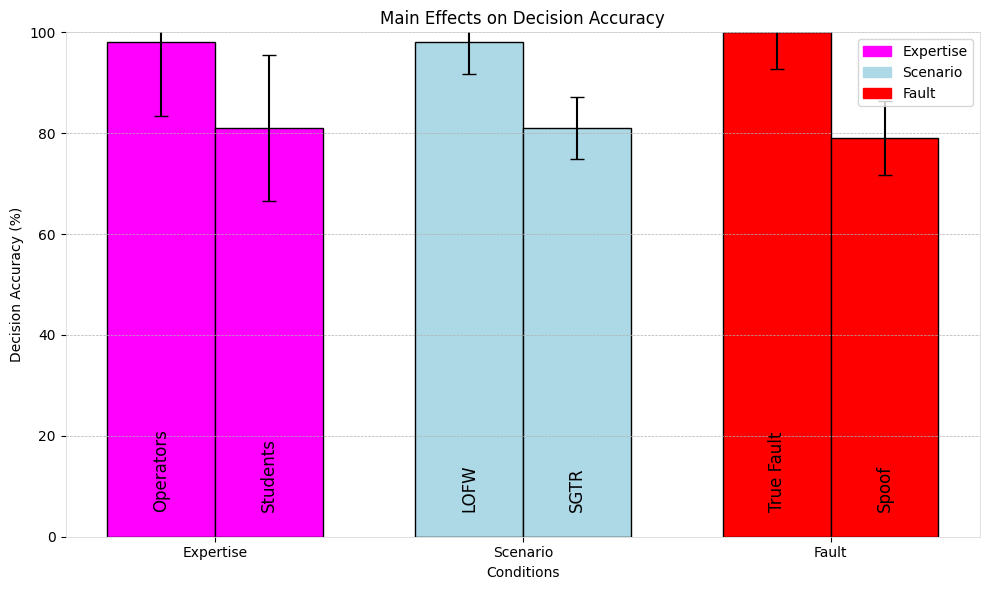

In [21]:
## claude

# Title and filename setup
title = 'Main Effects on Decision Accuracy'
filename = title.replace(' ', '_') + '.png'

# Data for mixed conditions
conditions = ['Expertise', 'Scenario', 'Fault']
levels = [['Operators', 'Students'], ['LOFW', 'SGTR'], ['True Fault', 'Spoof']]
means = [[98, 81], [98, 81], [100, 79]]
errors = [[14.5, 14.5], [6.2, 6.2], [7.3, 7.3]]
colors = ['magenta', 'lightblue', 'red']

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r = np.arange(len(conditions))
r1 = r - bar_width/2
r2 = r + bar_width/2

# Set the margin for the level labels
label_margin = 5

# Creating a figure with a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the main effects as vertical bars
for i in range(len(conditions)):
    ax.bar(r1[i], means[i][0], width=bar_width, yerr=errors[i][0], capsize=5, color=colors[i], edgecolor='black', linewidth=1)
    ax.bar(r2[i], means[i][1], width=bar_width, yerr=errors[i][1], capsize=5, color=colors[i], edgecolor='black', linewidth=1)
    for j in range(len(levels[i])):
        ax.text(r[i] + bar_width*(j-0.5), label_margin, levels[i][j], rotation=90, ha='center', va='bottom', fontsize=12)

# Adding a legend
legend_labels = ['Expertise', 'Scenario', 'Fault']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(colors))]
ax.legend(legend_handles, legend_labels, loc='upper right')

ax.set_title('Main Effects on Decision Accuracy')
ax.set_ylabel('Decision Accuracy (%)')
ax.set_xlabel('Conditions')
ax.set_xticks(r)
ax.set_xticklabels(conditions)
ax.set_ylim(0, 100)
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Adjusting axes
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_color('lightgray')
    ax.spines[spine].set_linewidth(0.5)

# Save the figure as a PNG file
plt.tight_layout()
plt.savefig(filename, format='png', dpi=300)
print(filename)
plt.show()

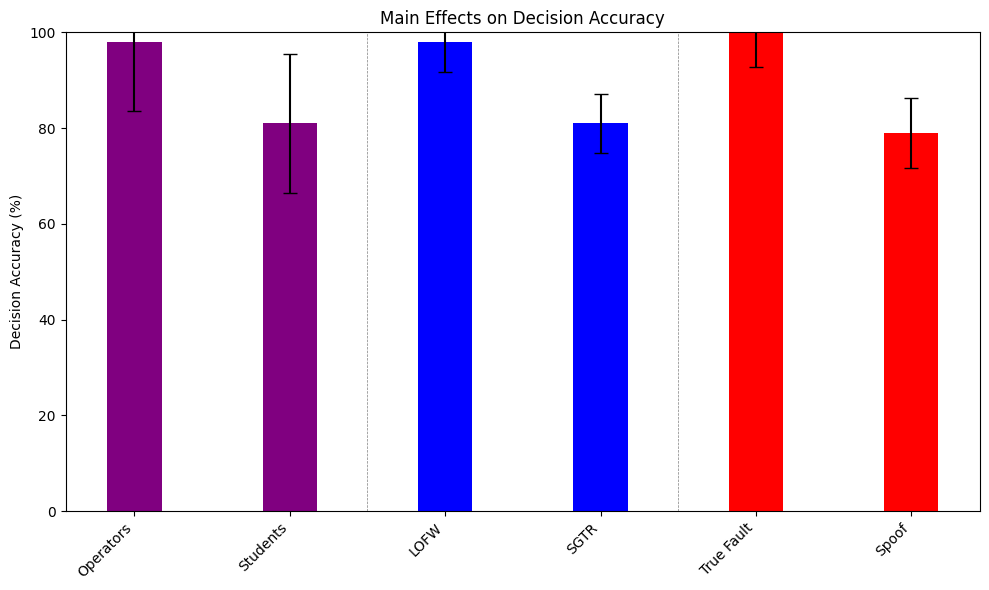

In [16]:

# Data setup
levels = ['Operators', 'Students', 'LOFW', 'SGTR', 'True Fault', 'Spoof']
means = [98, 81, 98, 81, 100, 79]  # Adjusted for percentage
errors = [14.5, 14.5, 6.2, 6.2, 7.3, 7.3]  # Adjusted for percentage
colors = ['purple', 'blue', 'red']  # Simplified to one color per condition type

# X locations for the bars
ind = np.arange(len(levels))  # Assign each level a separate x position

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars individually
for i in range(len(levels)):
    ax.bar(ind[i], means[i], yerr=errors[i], width=width, color=colors[i // 2], capsize=5)

ax.set_ylabel('Decision Accuracy (%)')
ax.set_title('Main Effects on Decision Accuracy')
ax.set_xticks(ind)
ax.set_xticklabels(levels, rotation=45, ha="right")
ax.set_ylim([0, 100])  # Adjust y-axis limits

# Adjust the spacing between condition groups by manually adding vertical lines or using whitespace in labels
for group_start in [2, 4]:
    ax.axvline(x=group_start - 0.5, color='gray', linestyle='--', linewidth=0.5)  # Optional: add separation lines

plt.tight_layout()
plt.show()
